In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'Time (s)')

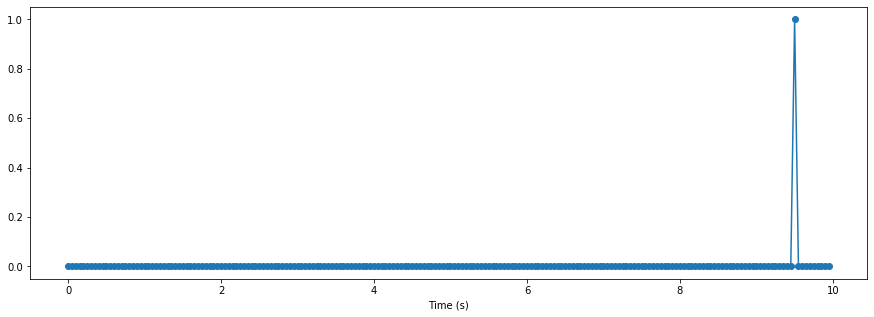

In [120]:
# Create an impulse function
Fs = 20
T = 10

t = np.arange(0,T,1/Fs)
x = np.zeros(t.shape[0])

x[190] = 1
plt.figure(figsize=(15,5))
plt.plot(t,x,'o-')
plt.xlabel('Time (s)')

Define a convolution "kernel" (also known as an impulse response function). We will use the "Heaviside step function," $\Theta(t) = 1$ if $t\geq 0$, $0$ otherwise.

$$h(t) = \sin(2\pi t) \Theta(t-1)\Theta(5-t)$$

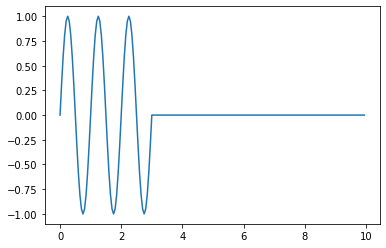

In [121]:
h = np.sin(2*np.pi*t) * (t<3) * (t>0)
plt.plot(t,h)

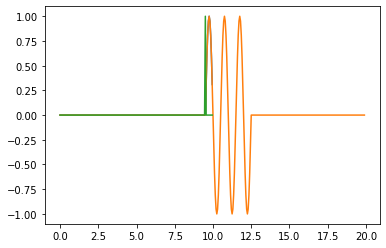

In [122]:
y = np.convolve(x,h)
N = x.shape[0]
plt.plot(t, y[0:N])
plt.plot(np.arange(len(y))*(1/Fs), y)
plt.plot(t,x)

In [82]:
X = np.fft.fft(x) # Discrete Fourier transform (DFT) of x
H = np.fft.fft(h) # DFT of h
Y = X*H           # Convolution theorem tells me that Y = X*H
y = np.fft.ifft(Y)

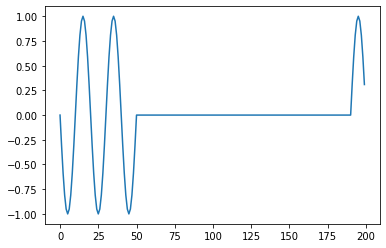

In [83]:
plt.plot(np.real(y))

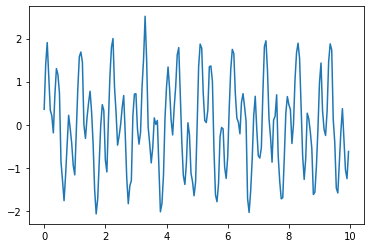

In [116]:
x = np.sin(2*np.pi*t*1)+np.sin(2*np.pi*t*2.8) + 0.2*np.random.randn(len(t))
plt.plot(t,x)

Text(0, 0.5, 'Power (arbitrary units)')

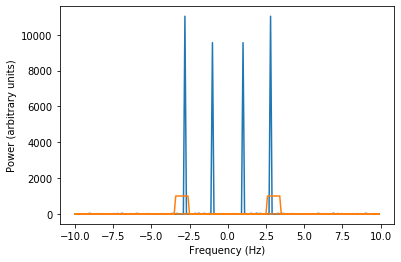

In [117]:
f = np.fft.fftfreq(len(x), d=1/Fs)
X = np.fft.fft(x)
plt.plot(f, np.abs(X)**2)
plt.plot(f, 1000*(np.abs(f)<3.5)*(np.abs(f)>2.5))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (arbitrary units)')

In [118]:
# h = np.sin(2*np.pi*t*1)
X = np.fft.fft(x) # Discrete Fourier transform (DFT) of x
# H = np.fft.fft(h) # DFT of h
Y = X * (np.abs(f)<3.5)*(np.abs(f)>2.5)
y = np.fft.ifft(Y)

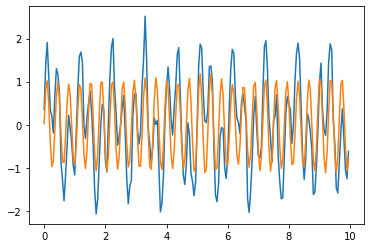

In [119]:
plt.plot(t,x)
plt.plot(t,y)

Text(0, 0.5, 'Power (arbitrary units)')

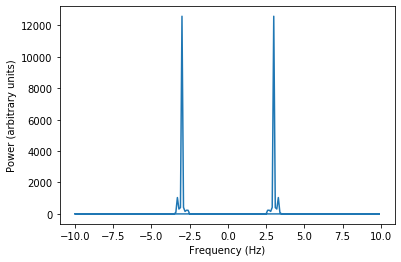

In [104]:
f = np.fft.fftfreq(len(x), d=1/Fs)
Y = np.fft.fft(y)
plt.plot(f, np.abs(Y)**2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (arbitrary units)')